# Electrical Annual Production - Data Exploration 

In this project, we will be using on of **[ENEDIS](https://fr.wikipedia.org/wiki/Enedis)** open dataset, available on its [Open Data](https://data.enedis.fr/pages/accueil/?id=init) platform. 
The chosen dataset is the one regarding [annual electrical production by departments](https://data.enedis.fr/explore/dataset/production-electrique-par-filiere-a-la-maille-departement/information/?sort=annee), the dataset has already been cleaned and so our main objective will be to try to see if we could perform some more cleaning to better fit the data to our secondary objective : performing a overall exploration of the dataset.  

One remark should be made before starting. What is meant by "production" here refers to the electricity produced by users of the infrastructure (with *hydrolic power*, *wind turbines*, *solar panels*, ...), it is not the electricity produced by electricity providers (see [here](https://www.enedis.fr/produire-de-lelectricite-en-bt-36-kva-hta#onglet-preparation-du-projet) for more on the subject).

In [128]:
#Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap, LinearSegmentedColormap, Normalize

%matplotlib inline

The dataset could be downloaded in diverse data formats, let's check CSV and JSON.

## Choose Data Format

### CSV Import

In [2]:
data_csv = pd.read_csv('production-electrique-par-filiere-a-la-maille-departement.csv', delimiter=";")
data_csv.head(2)

,Année,Nom département,Code département,Nom région,Code région,Domaine de tension,Nb sites Photovoltaïque Enedis,Energie produite annuelle Photovoltaïque Enedis (MWh),Nb sites Eolien Enedis,Energie produite annuelle Eolien Enedis (MWh),Nb sites Hydraulique Enedis,Energie produite annuelle Hydraulique Enedis (MWh),Nb sites Bio Energie Enedis,Energie produite annuelle Bio Energie Enedis (MWh),Nb sites Cogénération Enedis,Energie produite annuelle Cogénération Enedis (MWh),Nb sites Autres filières Enedis,Energie produite annuelle Autres filières Enedis (MWh),geom,geo_point_2d
0,2019,Lot,46,Occitanie,76,HTA,5.0,35095.257167,0.0,0.000,27.0,104494.475222,1.0,9507.769833,0.0,0.000,0.0,0.000000,"{""type"": ""Polygon"", ""coordinates"": [[[1.364096...","44.6246196077,1.60550977706"
1,2019,Ille-et-Vilaine,35,Bretagne,53,HTA,10.0,8546.766833,18.0,278820.878,1.0,265.795333,13.0,113544.304621,15.0,168474.081,4.0,95.136667,"{""type"": ""MultiPolygon"", ""coordinates"": [[[[-1...","48.1551302397,-1.63817509208"


The dataset seems ready to use even if some additional cleaning could be applied in order to clarify some of the data, column names for example or data types (for instance in `Domaine de tension` column there is a mix of string and numeric values).  
For this project let's check the **JSON** data format.

### JSON Import

In [3]:
data_json = pd.read_json('production-electrique-par-filiere-a-la-maille-departement.json')
data_json.head(2)

,datasetid,recordid,fields,geometry,record_timestamp
0,production-electrique-par-filiere-a-la-maille-...,3a7fb79f65a227db91b6105399213aec1cc46ff9,{'energie_produite_annuelle_bio_energie_enedis...,"{'type': 'Point', 'coordinates': [1.6055097770...",2020-10-07T15:21:19.899+02:00
1,production-electrique-par-filiere-a-la-maille-...,2b74b2abc9e6ac3d89eef09222809000a425db20,{'energie_produite_annuelle_bio_energie_enedis...,"{'type': 'Point', 'coordinates': [-1.638175092...",2020-10-07T15:21:19.899+02:00


With **JSON** some pre-processing is needed before being able to work with the data. Let's explore the columns

In [4]:
data_json.describe(include='all')

,datasetid,recordid,fields,geometry,record_timestamp
count,2538,2538,2538,282,2538
unique,1,2538,2538,95,5
top,production-electrique-par-filiere-a-la-maille-...,2a8f9361b1ec09fef5d1249918838f02e28e060c,{'energie_produite_annuelle_bio_energie_enedis...,"{'type': 'Point', 'coordinates': [1.6055097770...",2019-04-01T11:26:10.217+02:00
freq,2538,1,1,3,1410


As could have been expected with a *JSON file* we have 2 columns that does not provide any useful information for us :  
* `datasetid` being the id of the dataset, a unique value found on every data-point 
* `recordid`, the unique id of the data-point, which we will replace by the dataframe index id

The `fields` column seems to be the one of interest, the one containing every `key:value` pairs holding the data. 

In [5]:
# converting json dataset from dictionary to dataframe
elec_df = pd.DataFrame.from_dict(data_json['fields'].values.tolist())
elec_df.head(2)

,energie_produite_annuelle_bio_energie_enedis_mwh,nb_sites_eolien_enedis,nom_departement,nb_sites_photovoltaique_enedis,energie_produite_annuelle_hydraulique_enedis_mwh,domaine_de_tension,nb_sites_hydraulique_enedis,nb_sites_bio_energie_enedis,geo_point_2d,nb_sites_autres_filieres_enedis,energie_produite_annuelle_eolien_enedis_mwh,energie_produite_annuelle_cogeneration_enedis_mwh,geom,nb_sites_cogeneration_enedis,code_region,code_departement,annee,energie_produite_annuelle_photovoltaique_enedis_mwh,energie_produite_annuelle_autres_filieres_enedis_mwh,nom_region
0,9507.769833,0.0,Lot,5.0,104494.475222,HTA,27.0,1.0,"[44.6246196077, 1.60550977706]",0.0,0.000,0.000,"{'type': 'Polygon', 'coordinates': [[[1.364096...",0.0,76,46,2019,35095.257167,0.000000,Occitanie
1,113544.304621,18.0,Ille-et-Vilaine,10.0,265.795333,HTA,1.0,13.0,"[48.1551302397, -1.63817509208]",4.0,278820.878,168474.081,"{'type': 'MultiPolygon', 'coordinates': [[[[-1...",15.0,53,35,2019,8546.766833,95.136667,Bretagne


Now that we have our columns, lets do some data cleaning

## Data Cleaning

In [6]:
elec_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2538 entries, 0 to 2537
Data columns (total 20 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   energie_produite_annuelle_bio_energie_enedis_mwh      2446 non-null   float64
 1   nb_sites_eolien_enedis                                2048 non-null   float64
 2   nom_departement                                       2538 non-null   object 
 3   nb_sites_photovoltaique_enedis                        2480 non-null   float64
 4   energie_produite_annuelle_hydraulique_enedis_mwh      2056 non-null   float64
 5   domaine_de_tension                                    2538 non-null   object 
 6   nb_sites_hydraulique_enedis                           2056 non-null   float64
 7   nb_sites_bio_energie_enedis                           2446 non-null   float64
 8   geo_point_2d                                          282 

Most of the columns are of *numeric types* and the rest are *string* **but** some of the `object` Dtype (string) should be numeric values to facilitate our future data exploration.   
Moreover, it seems that some columns are have *missing values* (quick note : the **geocoordinates** columns will be identified as `NaN` as there still have **JSON formatted** values. As those columns are mostly of interest for departments plotting we will remove them of the dataframe.

### Drop columns and deal with Missing Values

In [7]:
#Drop geocoord columns
elec_df.drop(['geom', 'geo_point_2d', 'code_region'], axis=1, inplace=True)

In [8]:
#Explore Null values
elec_df.isnull().sum().sort_values(ascending=False)

nb_sites_eolien_enedis                                  490
energie_produite_annuelle_eolien_enedis_mwh             490
nb_sites_hydraulique_enedis                             482
energie_produite_annuelle_hydraulique_enedis_mwh        482
energie_produite_annuelle_bio_energie_enedis_mwh         92
nb_sites_bio_energie_enedis                              92
nb_sites_cogeneration_enedis                             71
energie_produite_annuelle_cogeneration_enedis_mwh        71
energie_produite_annuelle_photovoltaique_enedis_mwh      58
nb_sites_photovoltaique_enedis                           58
nb_sites_autres_filieres_enedis                          12
energie_produite_annuelle_autres_filieres_enedis_mwh     12
domaine_de_tension                                        0
code_departement                                          0
nom_departement                                           0
annee                                                     0
nom_region                              

From what is easily observable with the `NaN` values, if a department does not produce any electricity from **wind 
turbines** or **hydrolic power** the quantity of produced energy is likely to be 0 as well as the number of production sites.  
The logic is the same for the other production types. We can then conclude that the `NaN` values are in fact **not** missing values but rather the logical consequence of the absence of the considered production.  
Nevertheless, it would be best if those values were equal to `0`.

In [9]:
#Replace NaN values by 0
elec_df.fillna(0., inplace=True)

### Clarify column names and data type

In [10]:
columns_to_rename = {
    'energie_produite_annuelle_bio_energie_enedis_mwh': 'bio_energie_mwh',
    'energie_produite_annuelle_hydraulique_enedis_mwh': 'hydraulique_mwh',
    'energie_produite_annuelle_eolien_enedis_mwh': 'eolien_mwh',
    'energie_produite_annuelle_cogeneration_enedis_mwh': "cogeneration_mwh",
    'energie_produite_annuelle_photovoltaique_enedis_mwh': "photovoltaique_mwh",
    'energie_produite_annuelle_autres_filieres_enedis_mwh': 'autres_filieres_mwh'
}

#Simplify column names
elec_df.rename(columns_to_rename, axis=1, inplace=True)

Now that we have simpler column names we should check our data types. As we saw a few code blocks earlier, some columns have mixed data types (string and numeric for example), when others have `object` data type that would be of better and easier use if the values were identified as `numeric`.

In [11]:
elec_df['domaine_de_tension'].value_counts()

BT > 36 kVA     846
HTA             846
BT <= 36 kVA    846
Name: domaine_de_tension, dtype: int64

The `domaine_de_tension` column gives 2 types of information :  
* The type of voltage (*high* voltage line or *low*)
* For *low* voltage lines, the power level  

We could extract a new feature from this column : the `volatage_line_type` and slightly adjust the residual information (> 36 kVA or <= 36 kVA) **but** this treatment would be time consuming and poorly beneficial for our analysis as the data in its current state is clear as it only has 3 possible values, which does not increase the complexity of the interpretation.  
We could however realize later that it would be best to only distinguish `BT` from `HTA` which will be easier to do with a column dedicated to the `voltage_line_type`.

In [12]:
#Change column datatype to numeric
elec_df['annee'] = pd.to_numeric(elec_df['annee'])
elec_df['code_departement'] = pd.to_numeric(elec_df['code_departement'])

## Get insights from Data

Now that the dataset is cleaned up, let's look at the data and try to extract useful information from it

In [13]:
elec_df['nom_departement'].value_counts()

Haute-Marne              27
Haute-Vienne             27
Tarn-et-Garonne          27
Nord                     27
Calvados                 27
                         ..
Val-d'Oise               27
Sarthe                   27
Aube                     27
Territoire-de-Belfort    18
Territoire de Belfort     9
Name: nom_departement, Length: 95, dtype: int64

We know that our dataset covers the `2011-2019` period, and as there could be maximum 3 different `domaine_de_tension` it explains why the `nom_departement` count is made of multiples of 9 (9 years with as much as 3 domaine_de_tension each year). 

In [14]:
#Check elecricity national production evolution
pattern = r'_mwh|annee'
nat_elec = elec_df.filter(regex=pattern).groupby('annee').agg('sum').reset_index()

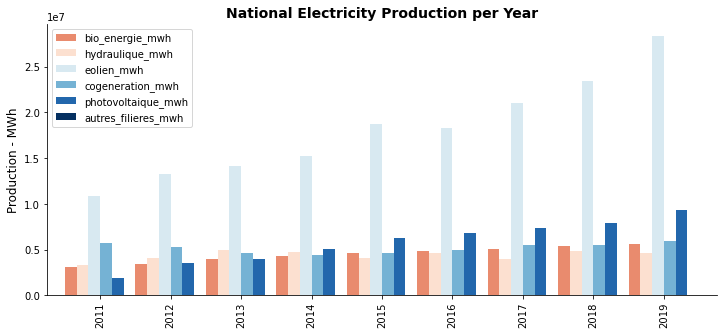

In [15]:
#Adjust colormap to avoid white
cmap = mpl.cm.RdBu(np.linspace(0,1,20))
cmap = mpl.colors.ListedColormap(cmap[5:,:-1])

#Plot electricity national production evolution
fig = plt.figure(figsize=(12,5))
ax1 = fig.add_subplot(1,1,1)
nat_elec.plot.bar(x='annee', width=1, colormap=cmap, ax=ax1)

#Set title and axes lables
ax1.set_title('National Electricity Production per Year', weight='bold', fontsize=14)
ax1.set_xlabel('')
ax1.set_ylabel('Production - MWh', fontsize=12)

#Remove top and right plot borders
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)

The plot shows us that over the last 9 years, `wind powered` production, which was already the most used mean of production, has risen the most. The other production types have more or less plateaued except for `photovoltaic` production.  

We will now focus on `wind powered` productions.

### Wind Power on the Rise

Based on the previous plot, it is clear that wind powered electrical production has and still is the main energy source since 2011.

In [140]:
nb_sites = elec_df[['nb_sites_eolien_enedis', 'annee']].groupby('annee').agg('sum').reset_index()
nb_sites = nb_sites[(nb_sites['annee'] == 2011) | (nb_sites['annee'] == 2015) | (nb_sites['annee'] == 2019)]

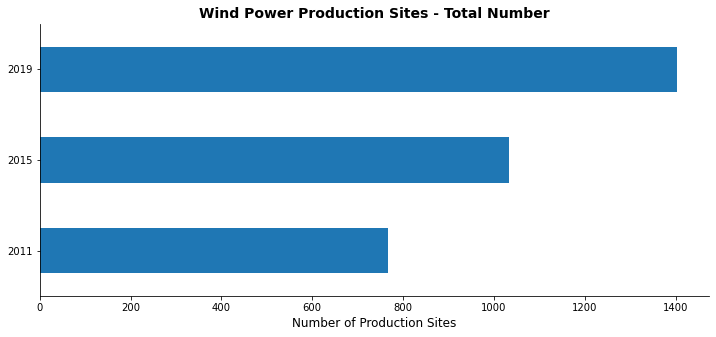

In [141]:
#Plot electricity national production evolution
fig2 = plt.figure(figsize=(12,5))
ax2 = fig2.add_subplot(1,1,1)
nb_sites.plot.barh(x='annee', ax=ax2, legend=False)

#Set title and axes lables
ax2.set_title('Wind Power Production Sites - Total Number', weight='bold', fontsize=14)
ax2.set_ylabel('')
ax2.set_xlabel('Number of Production Sites', fontsize=12)

#Remove top and right plot borders
ax2.spines['right'].set_visible(False)
ax2.spines['top'].set_visible(False)

As anticipated, the rise in MWh produced by wind power energy is matched with a rise in the number of sites, but how has this production evolved at a **geographical** level ?

In [142]:
#Columns to keep
eol_col = [
    'nb_sites_eolien_enedis', 
    'nom_departement',
    'domaine_de_tension',
    'eolien_mwh',
    'code_departement', 
    'annee',
    'nom_region'
]

eol_df = elec_df[eol_col]
eol_df = eol_df.loc[eol_df['eolien_mwh'] > 0]

In [258]:
#Regroup data by year, geography and voltage
eol_grp = eol_df.groupby(['annee', 'nom_departement']).agg({'nb_sites_eolien_enedis':'sum', 'eolien_mwh':'sum'})

In [259]:
#Only keep the top 5 area by number of production sites
years = [2011,2015,2019]
sites_top = {}

for y in years:
    sites_top[y] = eol_grp.loc[y,'nb_sites_eolien_enedis'].sort_values(ascending=False).nlargest(5)
    
#Doing the same for the total production
mwh_top = {}

for y in years:
    mwh_top[y] = eol_grp.loc[y,'eolien_mwh'].sort_values(ascending=False).nlargest(5)

In [260]:
sites_top_df = pd.DataFrame(sites_top).fillna(0).reset_index()
mwh_top_df = pd.DataFrame(mwh_top).fillna(0).reset_index()

In [261]:
sites_top_df

,index,2011,2015,2019
0,Aisne,0.0,42.0,85.0
1,Aube,0.0,51.0,73.0
2,Côtes-d'Armor,45.0,0.0,0.0
3,Finistère,36.0,0.0,0.0
4,Marne,0.0,67.0,90.0
5,Meuse,34.0,0.0,0.0
6,Pas-de-Calais,57.0,75.0,94.0
7,Somme,42.0,81.0,116.0


In [262]:
round(mwh_top_df,2)

,index,2011,2015,2019
0,Aisne,0.00,794979.49,1881361.76
1,Aube,0.00,1180710.33,1779659.13
2,Eure-et-Loir,525862.42,0.00,0.00
3,Marne,565576.42,1204966.29,1905259.90
4,Meuse,597231.51,0.00,0.00
5,Pas-de-Calais,834638.63,1577954.04,1920337.48
6,Somme,780845.82,1606730.03,2457135.12


The leading departments in terms of number of production sites are consistent with the ones based on total production except for a fiew exceptions like `Finistère` or `Côtes-d'Armor` which although being in the top 5 by number of sites, they are not in terms of total production.   
This could be explain by the `type of voltage` indeed, **high voltage** installations will produce much more than **low voltage** ones. `Finistère` or `Côtes-d'Armor` have many sites of **low voltage** production, placing them in the top when the corresponding production is marginal.  

The same is true for `Eure-et-Loir` which is one of the most producing region in 2011 without having as many installations as the top regions. Is the production more efficient in this department ?

## Conclusion

This concludes our basic exploration of the dataset. The main conclusion is that `wind powered` production is the leader in terms of **quantity of electricity produced** but also in terms of **implementation rate**.  
On other interesting thing is that the leading departments in terms of production **AND** number of sites are located in the **northen** parts of France.   
It is interesting when we know that those departments are windy but not the windiest. Maybe some more insights could be gained by looking at factors that could have promoted the seemingly development of *wind produced* electricity in the North of the country, maybe :
* public policies and/or fundings (as well as private)
* landscape